# CROSS-TESTING: Balanced vs Imbalanced Models

In [1]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Load Models and Vectorizers

In [2]:
import os
import joblib

# Define the models directory
model_dir = r"..\models"  # Replace with the correct path if different

# Load models
model_balanced = joblib.load(os.path.join(model_dir, "Model_Balanced.pkl"))      # Model A
model_imbalanced = joblib.load(os.path.join(model_dir, "Model_Imbalanced.pkl"))  # Model B

# Load vectorizers
vectorizer_balanced = joblib.load(os.path.join(model_dir, "tfidf_Balanced.pkl"))
vectorizer_imbalanced = joblib.load(os.path.join(model_dir, "tfidf_Imbalanced.pkl"))

print("Models and TF-IDF Vectorizers loaded successfully.\n")



Models and TF-IDF Vectorizers loaded successfully.



# Load Test Sets

In [3]:

# Define data directories
data_dir_balanced = r"..\data\new data"
data_dir_imbalanced =r"..\data\new data"

# Load test datasets
balanced_test = pd.read_csv(os.path.join(data_dir_balanced, "balanced_test.csv"), encoding='latin-1')
imbalanced_test = pd.read_csv(os.path.join(data_dir_imbalanced, "imbalanced_test.csv"), encoding='latin-1')

# Print shapes
print("Balanced Test Set Shape:", balanced_test.shape)
print("Imbalanced Test Set Shape:", imbalanced_test.shape)

# Quick preview
print("\nBalanced Test Set Sample:")
print(balanced_test.head())

print("\nImbalanced Test Set Sample:")
print(imbalanced_test.head())


Balanced Test Set Shape: (1861, 2)
Imbalanced Test Set Shape: (7338, 2)

Balanced Test Set Sample:
                                              Review  Rating
0  okay read short short story story good wish li...       3
1  interesting story like main character interest...       4
2  story start ok way apparent writer not vision ...       2
3  understand point view story tell goodness tell...       1
4  understand war warning content sensuality viol...       3

Imbalanced Test Set Sample:
                                              Review  Rating
0  post romancing book blogreviewe bymollyreview ...       3
1  book wonderful example historical fiction felt...       4
2  hot erotic sweet fast read maybe fast interest...       4
3  fun holidaywinter anthology nice variety story...       4
4  love far not read devyn dawson not love m big ...       5


# CROSS-TEST 1: Model_A (Balanced) on Imbalanced Test Set

Accuracy: 0.4785

              precision    recall  f1-score   support

           1     0.2520    0.6196    0.3583       255
           2     0.2949    0.3557    0.3224       582
           3     0.2196    0.3934    0.2819       694
           4     0.6544    0.4190    0.5109      3470
           5     0.5578    0.6072    0.5814      2337

    accuracy                         0.4785      7338
   macro avg     0.3957    0.4790    0.4110      7338
weighted avg     0.5400    0.4785    0.4914      7338



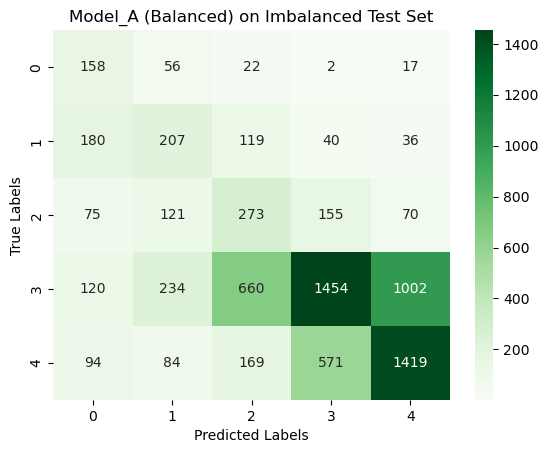

In [4]:
X_imb_tfidf_for_balanced = vectorizer_balanced.transform(imbalanced_test["Review"])
y_imb_true = imbalanced_test["Rating"]

y_imb_pred_from_balanced = model_balanced.predict(X_imb_tfidf_for_balanced)

print(f"Accuracy: {accuracy_score(y_imb_true, y_imb_pred_from_balanced):.4f}\n")
print(classification_report(y_imb_true, y_imb_pred_from_balanced, digits=4))

cm1 = confusion_matrix(y_imb_true, y_imb_pred_from_balanced)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens')
plt.title('Model_A (Balanced) on Imbalanced Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# CROSS-TEST 2: Model_B (Imbalanced) on Balanced Test Set

Accuracy: 0.4691

              precision    recall  f1-score   support

           1     0.5680    0.5054    0.5349       372
           2     0.4360    0.3387    0.3812       372
           3     0.3629    0.3727    0.3677       373
           4     0.4120    0.5364    0.4660       371
           5     0.5893    0.5925    0.5909       373

    accuracy                         0.4691      1861
   macro avg     0.4736    0.4691    0.4682      1861
weighted avg     0.4737    0.4691    0.4682      1861



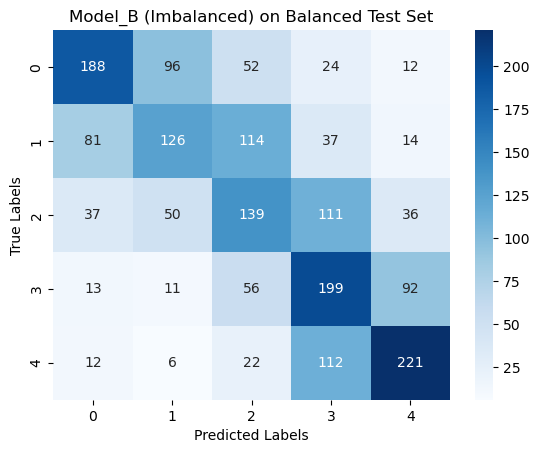

In [5]:
X_bal_tfidf_for_imbalanced = vectorizer_imbalanced.transform(balanced_test["Review"])
y_bal_true = balanced_test["Rating"]

y_bal_pred_from_imbalanced = model_imbalanced.predict(X_bal_tfidf_for_imbalanced)

print(f"Accuracy: {accuracy_score(y_bal_true, y_bal_pred_from_imbalanced):.4f}\n")
print(classification_report(y_bal_true, y_bal_pred_from_imbalanced, digits=4))

cm2 = confusion_matrix(y_bal_true, y_bal_pred_from_imbalanced)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Model_B (Imbalanced) on Balanced Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



# Summary Comparison

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# Compute metrics for Model_A (Balanced) on Imbalanced Test Set
acc_bal_on_imb = accuracy_score(y_imb_true, y_imb_pred_from_balanced)
prec_bal_on_imb = precision_score(y_imb_true, y_imb_pred_from_balanced, average='macro')
rec_bal_on_imb = recall_score(y_imb_true, y_imb_pred_from_balanced, average='macro')
f1_bal_on_imb = f1_score(y_imb_true, y_imb_pred_from_balanced, average='macro')

# Compute metrics for Model_B (Imbalanced) on Balanced Test Set
acc_imb_on_bal = accuracy_score(y_bal_true, y_bal_pred_from_imbalanced)
prec_imb_on_bal = precision_score(y_bal_true, y_bal_pred_from_imbalanced, average='macro')
rec_imb_on_bal = recall_score(y_bal_true, y_bal_pred_from_imbalanced, average='macro')
f1_imb_on_bal = f1_score(y_bal_true, y_bal_pred_from_imbalanced, average='macro')

# Create summary DataFrame
summary_df = pd.DataFrame({
    "Model": ["Model_A (Balanced)", "Model_B (Imbalanced)"],
    "Test Set": ["Imbalanced Test Set", "Balanced Test Set"],
    "Accuracy": [acc_bal_on_imb, acc_imb_on_bal],
    "Precision (Macro)": [prec_bal_on_imb, prec_imb_on_bal],
    "Recall (Macro)": [rec_bal_on_imb, rec_imb_on_bal],
    "F1-Score (Macro)": [f1_bal_on_imb, f1_imb_on_bal]
})


print(" Cross-Test Summary: \n")
summary_df



 Cross-Test Summary: 



,Model,Test Set,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
0,Model_A (Balanced),Imbalanced Test Set,0.478468,0.395729,0.478972,0.410983
1,Model_B (Imbalanced),Balanced Test Set,0.469103,0.473646,0.469124,0.468153
